**Importing Libraries**

In [2]:
# Load libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import os

In [3]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Splitting Dataset in Training Testing and Validation**

In [4]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Cotton Disease Prediction/cotton', output="/content/drive/MyDrive/Cotton Disease Prediction/cotton_new_data", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 1711 files [00:37, 46.04 files/s]


**Training and DataLoader**

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [7]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Disease Prediction/cotton_new_data/train',
                                                 target_size=  (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1365 images belonging to 4 classes.


In [8]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Disease Prediction/cotton_new_data/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 176 images belonging to 4 classes.


**Model Initialisation**

In [9]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax')) 

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1

**Training the CNN**:-
With Epoch = 10 and Learning rate = 0.25

In [11]:
# Learning rate
from keras.optimizers import SGD

learning_rate = 0.25
sgd = SGD(lr=learning_rate)

# Compiling the CNN
cnn.compile(optimizer = 'sgd',loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
43/43 [==============================] - 22s 501ms/step - loss: 1.3498 - accuracy: 0.3582 - val_loss: 1.2670 - val_accuracy: 0.5398
Epoch 2/10
43/43 [==============================] - 17s 402ms/step - loss: 1.2459 - accuracy: 0.4542 - val_loss: 1.1518 - val_accuracy: 0.5795
Epoch 3/10
43/43 [==============================] - 19s 448ms/step - loss: 1.1269 - accuracy: 0.5223 - val_loss: 1.0262 - val_accuracy: 0.5795
Epoch 4/10
43/43 [==============================] - 19s 436ms/step - loss: 1.0497 - accuracy: 0.5546 - val_loss: 0.9880 - val_accuracy: 0.5909
Epoch 5/10
43/43 [==============================] - 16s 380ms/step - loss: 0.9915 - accuracy: 0.5766 - val_loss: 1.0378 - val_accuracy: 0.5739
Epoch 6/10
43/43 [==============================] - 17s 394ms/step - loss: 0.9575 - accuracy: 0.6095 - val_loss: 0.9162 - val_accuracy: 0.6023
Epoch 7/10
43/43 [==============================] - 18s 429ms/step - loss: 0.8871 - accuracy: 0.6234 - val_loss: 0.7951 - val_accuracy: 0.6705

**Testing**

In [12]:
import keras.utils as image
test_image = image.load_img('/content/drive/MyDrive/Cotton Disease Prediction/cotton_new_data/test/curl_virus/curl191.jpg',
                            target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 168ms/step


In [13]:
result

array([[0.07787844, 0.74706084, 0.12714191, 0.04791875]], dtype=float32)

In [14]:
result = result.ravel() 

In [15]:
result

array([0.07787844, 0.74706084, 0.12714191, 0.04791875], dtype=float32)

In [16]:
max(result)

0.74706084

In [17]:
print("Largest element is:", max(result))

Largest element is: 0.74706084


1/1 [==============================] - 0s 92ms/step
Predicted  Cotton Disease is:  curl_virus


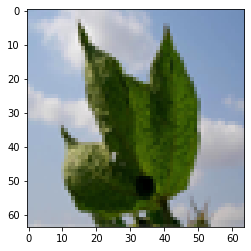

In [18]:
classes={0:'bacterial_blight',
 1:'curl_virus',
 2:'fussarium_wilt',
 3:'healthy'}

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
 data1=[]
 image = Image.open(img)
 image = image.resize((64,64))
 data1.append(np.array(image))
 X_test1=np.array(data1)
 predict_x=cnn.predict(X_test1)
 classes_x=np.argmax(predict_x,axis=1)
 return image,classes_x
plot,prediction = test_on_img(r'/content/drive/MyDrive/Cotton Disease Prediction/cotton_new_data/test/curl_virus/curl191.jpg')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted  Cotton Disease is: ", classes[a])
plt.imshow(plot)
plt.show()

**Graph for Epoch = 10 and Learning rate = 0.25**

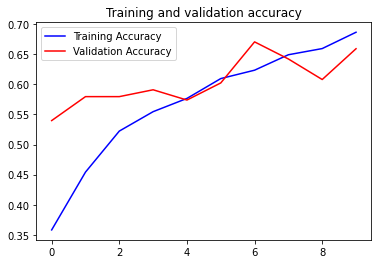

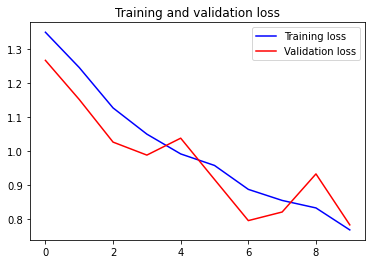

In [20]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


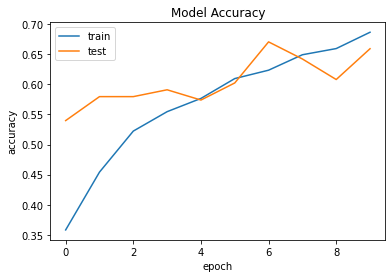

In [22]:

import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Training the CNN**:-
With Epoch = 20 and Learning rate = 0.50

In [21]:
# Learning rate
from keras.optimizers import SGD

learning_rate = 0.50
sgd = SGD(lr=learning_rate)

# Compiling the CNN
cnn.compile(optimizer = 'sgd',loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
history1=cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
43/43 [==============================] - 21s 476ms/step - loss: 0.7479 - accuracy: 0.7158 - val_loss: 0.7285 - val_accuracy: 0.6932
Epoch 2/20
43/43 [==============================] - 19s 442ms/step - loss: 0.7217 - accuracy: 0.7128 - val_loss: 0.7571 - val_accuracy: 0.6875
Epoch 3/20
43/43 [==============================] - 19s 451ms/step - loss: 0.6985 - accuracy: 0.7245 - val_loss: 1.0335 - val_accuracy: 0.5682
Epoch 4/20
43/43 [==============================] - 19s 438ms/step - loss: 0.6731 - accuracy: 0.7626 - val_loss: 0.6889 - val_accuracy: 0.7102
Epoch 5/20
43/43 [==============================] - 19s 438ms/step - loss: 0.6491 - accuracy: 0.7458 - val_loss: 0.7076 - val_accuracy: 0.6932
Epoch 6/20
43/43 [==============================] - 21s 502ms/step - loss: 0.6503 - accuracy: 0.7465 - val_loss: 0.6335 - val_accuracy: 0.7500
Epoch 7/20
43/43 [==============================] - 20s 443ms/step - loss: 0.5928 - accuracy: 0.7751 - val_loss: 0.6468 - val_accuracy: 0.7159

**Testing on the same image**

In [31]:
import keras.utils as image
test_image = image.load_img('/content/drive/MyDrive/Cotton Disease Prediction/cotton_new_data/test/curl_virus/curl191.jpg',
                            target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 26ms/step


In [32]:
result

array([[2.2954964e-03, 9.8129809e-01, 1.5818827e-02, 5.8757281e-04]],
      dtype=float32)

In [33]:
result = result.ravel() 

In [34]:
result

array([2.2954964e-03, 9.8129809e-01, 1.5818827e-02, 5.8757281e-04],
      dtype=float32)

1/1 [==============================] - 0s 19ms/step
Predicted  Cotton Disease is:  curl_virus


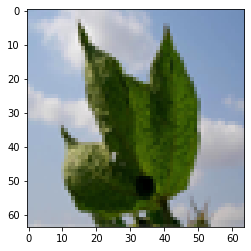

In [35]:
classes={0:'bacterial_blight',
 1:'curl_virus',
 2:'fussarium_wilt',
 3:'healthy'}

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
 data1=[]
 image = Image.open(img)
 image = image.resize((64,64))
 data1.append(np.array(image))
 X_test1=np.array(data1)
 predict_x=cnn.predict(X_test1)
 classes_x=np.argmax(predict_x,axis=1)
 return image,classes_x
plot,prediction = test_on_img(r'/content/drive/MyDrive/Cotton Disease Prediction/cotton_new_data/test/curl_virus/curl191.jpg')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted  Cotton Disease is: ", classes[a])
plt.imshow(plot)
plt.show()

**Graph for Epoch = 20 and Learning rate = 0.50**

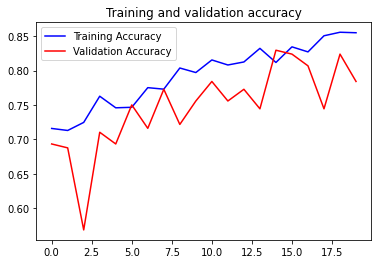

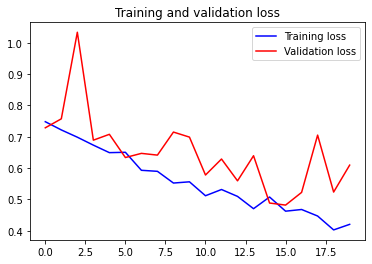

In [37]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


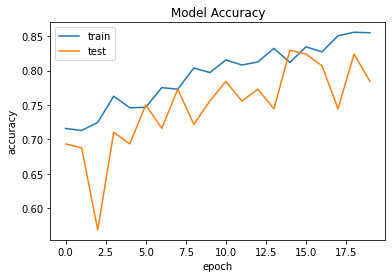

In [36]:

import matplotlib.pyplot as plt
# list all data in history
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Training the CNN**:-
With Epoch = 30 and Learning rate = 0.75

In [38]:
# Learning rate
from keras.optimizers import SGD

learning_rate = 0.75
sgd = SGD(lr=learning_rate)

# Compiling the CNN
cnn.compile(optimizer = 'sgd',loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
history3=cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
43/43 [==============================] - 21s 473ms/step - loss: 0.3984 - accuracy: 0.8637 - val_loss: 0.4552 - val_accuracy: 0.8239
Epoch 2/30
43/43 [==============================] - 18s 407ms/step - loss: 0.3563 - accuracy: 0.8762 - val_loss: 0.4495 - val_accuracy: 0.8466
Epoch 3/30
43/43 [==============================] - 19s 434ms/step - loss: 0.3963 - accuracy: 0.8520 - val_loss: 0.4719 - val_accuracy: 0.8295
Epoch 4/30
43/43 [==============================] - 18s 425ms/step - loss: 0.3567 - accuracy: 0.8799 - val_loss: 0.5423 - val_accuracy: 0.7955
Epoch 5/30
43/43 [==============================] - 19s 440ms/step - loss: 0.3823 - accuracy: 0.8637 - val_loss: 0.4373 - val_accuracy: 0.7955
Epoch 6/30
43/43 [==============================] - 25s 573ms/step - loss: 0.3481 - accuracy: 0.8850 - val_loss: 0.5395 - val_accuracy: 0.7955
Epoch 7/30
43/43 [==============================] - 21s 491ms/step - loss: 0.3307 - accuracy: 0.8747 - val_loss: 0.4101 - val_accuracy: 0.8239

**Testing on the same image**

In [39]:
import keras.utils as image
test_image = image.load_img('/content/drive/MyDrive/Cotton Disease Prediction/cotton_new_data/test/curl_virus/curl191.jpg',
                            target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 65ms/step


In [40]:
result

array([[6.7469664e-05, 9.9474168e-01, 5.1136613e-03, 7.7212979e-05]],
      dtype=float32)

1/1 [==============================] - 0s 64ms/step
Predicted  Cotton Disease is:  curl_virus


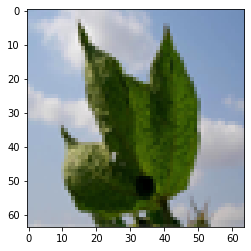

In [41]:
classes={0:'bacterial_blight',
 1:'curl_virus',
 2:'fussarium_wilt',
 3:'healthy'}

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
 data1=[]
 image = Image.open(img)
 image = image.resize((64,64))
 data1.append(np.array(image))
 X_test1=np.array(data1)
 predict_x=cnn.predict(X_test1)
 classes_x=np.argmax(predict_x,axis=1)
 return image,classes_x
plot,prediction = test_on_img(r'/content/drive/MyDrive/Cotton Disease Prediction/cotton_new_data/test/curl_virus/curl191.jpg')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted  Cotton Disease is: ", classes[a])
plt.imshow(plot)
plt.show()

**Graph for Epoch = 30 and Learning rate = 0.75**

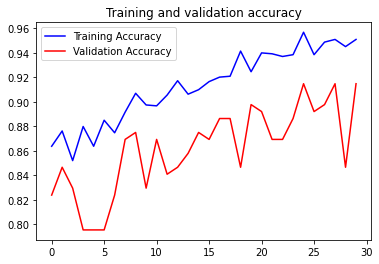

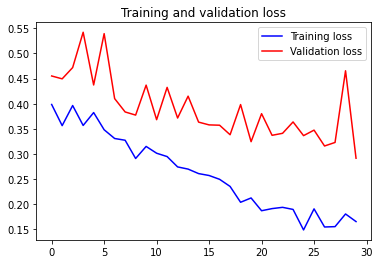

In [42]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


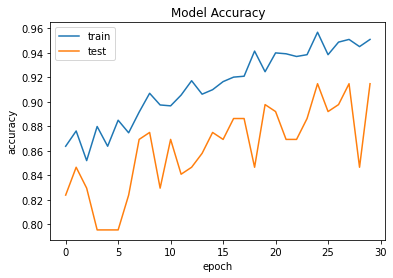

In [43]:
import matplotlib.pyplot as plt
# list all data in history
print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Conclusion**
We have tested the model with same image for different epochs and learning rate

At start, epoch 10 and learning rate = 0.25 for that training accuracy was 0.68 and testing accuracy was 0.74

Then we trained the model with epoch 20 and learning rate = 0.50 for that training accuracy was 0.85 and testing accuracy for the same image was 0.98

After incresing the epoch further to 30 and learning rate to 0.95 the training accuracy was increased to 0.99 but there was increase in testing accuracy 



